In [1]:
# Import all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

#Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Read file
# low memory is set to false since there are many records with inconsistant data type.
# Cleaning will be done after we load the data.

loan = pd.read_csv('loan.csv', low_memory=False)

In [3]:
# Get an idea on number of columns and data types.
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# Check for null values
loan.isnull().sum().sort_values(ascending=False).head()

total_il_high_credit_limit    39717
mo_sin_old_rev_tl_op          39717
bc_util                       39717
bc_open_to_buy                39717
avg_cur_bal                   39717
dtype: int64

In [5]:
# Extract all columns with all null values.
allNullColumns = loan.columns[loan.isnull().all()]

In [6]:
# Drop all columns with all nul vaues
loan = loan.drop(allNullColumns, axis=1)

In [7]:
# Extract all columns with any null values.
anyNullColumns = loan.columns[loan.isnull().any()]

In [8]:
# Check the % of null values.
round((loan[anyNullColumns].isnull().sum() / len(loan)) * 100, 2)

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [9]:
# Dropped columns where null values are more than 90%.
loan = loan.drop(['mths_since_last_record','next_pymnt_d'], axis=1)

In [10]:
# Find columns with number of values less than 2.
col = []
for i in loan.columns:
    if i == "term":
        continue
    t=loan[i].unique()
    if len(t) <= 2:
        print(i)
        col.append(i)
        print(loan[i].unique())

pymnt_plan
['n']
initial_list_status
['f']
collections_12_mths_ex_med
[ 0. nan]
policy_code
[1]
application_type
['INDIVIDUAL']
acc_now_delinq
[0]
chargeoff_within_12_mths
[ 0. nan]
delinq_amnt
[0]
tax_liens
[ 0. nan]


In [11]:
# After analsing above columns, we can drop these columns since these values are not adding any thing to analysis.
# List of columns to remove.
col

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [12]:
# Remove above columns which have all unique values.
loan = loan.drop(col, axis=1)

In [13]:
# Set Options to see more columns and rows for analysis.
pd.set_option('display.max_columns',120)
pd.set_option('display.max_rows',300)

In [14]:
# To get a look of the data set.
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [15]:
# Further Cleaning of columns with high level analysis.
# 'id','member_id' -- These columns are not required, since they all are unique ID for Borrower and record hence 
# does not add any value to analysis.
# 'url' -- This column is combination of some url, ending with 'id'. This is also unique and not needed for analysis.

loan = loan.drop(['id','member_id','url'], axis=1)

In [16]:
# Columns left to analyse.
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

# Analysis
####  Starting with Univariate Analysis and as we get sense of the data, we will move to Bivariate analysis.

### Analyse 'loan_status'

In [17]:
# Get an idea loan status (which is out target variable/column)
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

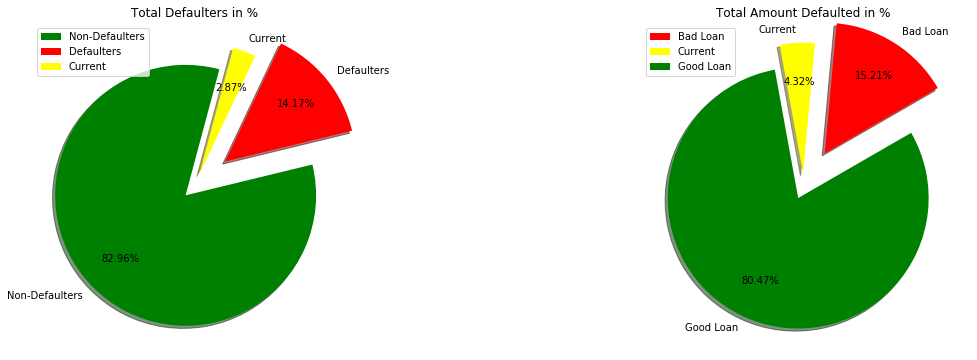

In [18]:
# Plot Pie Chart to see % distribution of each loan distribution accros data set.

plt.figure(figsize=(20,6))

# First Subplot shows the count of "Defaulters, Non-Defaulters and In-Progress" in %.
plt.subplot(1,2,1)
labels1=['Non-Defaulters','Defaulters','Current']
colors1 = ['Green','red','yellow']
explode1=[0.1,0.3,0.1]
plt.title('Total Defaulters in %')
loan['loan_status'].value_counts().plot.pie(autopct='%1.2f%%', labels=labels1, explode=explode1,pctdistance=.7,
                                                        startangle=75, colors=colors1, shadow=True)
plt.legend(labels1, loc='upper left')
plt.ylabel('')

# Second Subplot classifies what % of 'Funded Amount' is "Good Loan", "Bad Loan" or "Current".
plt.subplot(1,2,2)
labels2=['Bad Loan','Current','Good Loan']
colors2 = ['red','yellow','Green']
explode2=[0.3,0.1,0.1]
plt.title('Total Amount Defaulted in %')
loan.groupby('loan_status')['funded_amnt'].sum().plot.pie(autopct='%1.2f%%', shadow=True, explode=explode2,pctdistance=.7,
                        startangle=30, labels=labels2, colors=colors2 )
plt.legend(labels2, loc='upper left')
plt.ylabel('')

plt.show()

In [19]:
# Lets create new Derived column to categorise if loan is "Defaulted" or "Non-Defaulted".
# This derived column will be used later for high level analysis.
loan['default_status'] = np.where(loan.loan_status == 'Charged Off','Defaulted','Non-Defaulted')

### Observation:
##### Approx. 15% of 'Total loan Amount' is Defaulted and Approx. 14% of loans approved are Defaulted

### Analyse Amount Columns, (i.e. 'loan_amnt', 'funded_amnt', 'funded_amnt_inv')

In [20]:
# List down values just to get idea of how it looks.
# We can notice that, initial values are almost similar, lets plot and see.

loan[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].head(10)

,loan_amnt,funded_amnt,funded_amnt_inv
0,5000,5000,4975.0
1,2500,2500,2500.0
2,2400,2400,2400.0
3,10000,10000,10000.0
4,3000,3000,3000.0
5,5000,5000,5000.0
6,7000,7000,7000.0
7,3000,3000,3000.0
8,5600,5600,5600.0
9,5375,5375,5350.0


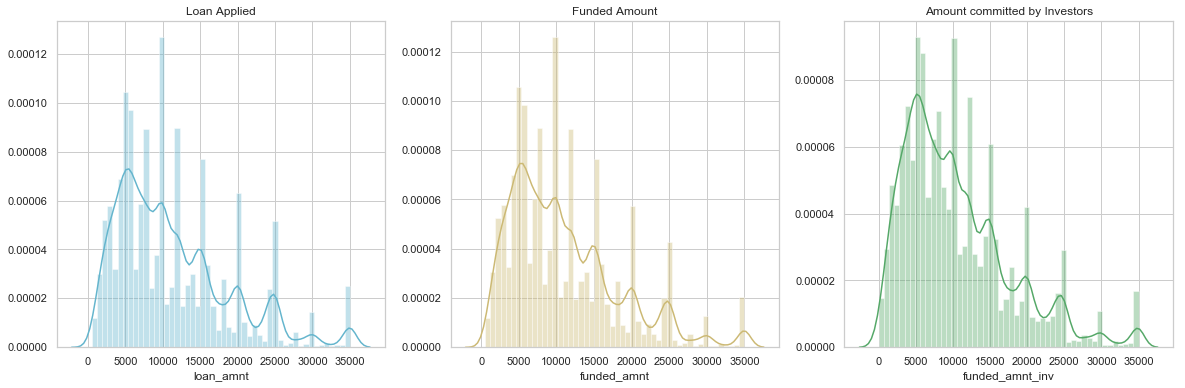

In [21]:
# Plotting a univariate distribution of observations for Amount Columns
plt.figure(figsize=(20,6))
sns.set(style="whitegrid")

plt.subplot(1,3,1)

plt.title("Loan Applied")
sns.distplot(loan['loan_amnt'], color='c')

plt.subplot(1,3,2)

plt.title("Funded Amount")
sns.distplot(loan['funded_amnt'], color='y')

plt.subplot(1,3,3)

plt.title("Amount committed by Investors")
sns.distplot(loan['funded_amnt_inv'], color='g')

plt.show()

In [22]:
# Find co-relation among these amount columns, since plot is almost similar.
loan[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].corr()

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.981578,0.940034
funded_amnt,0.981578,1.000000,0.958422
funded_amnt_inv,0.940034,0.958422,1.000000


In [23]:
# We can notice that there is high correlation within these three amount columns, which is also evidedent from plot.
# Going forward, we will analyse on 'funded_amnt' column only to avoid redundancy.

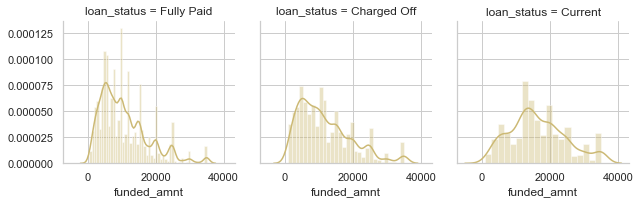

In [24]:
# Analyse 'funded_amnt' w.r.t 'loan_status' (i.e. Fully Paid, Charged Off and Current)
b = sns.FacetGrid(loan, col="loan_status") 
b.map(sns.distplot, "funded_amnt", color='y')

plt.show()

### Observation: 
##### From above plot, we can see that, maximum loan amount applied and funded is 10,000.
##### We can see that range is almost same for "Fully Paid" and "Charged Off" loans for funded amount.

### Analyse "Loan Issue Date" (i.e. 'issue_d')

In [25]:
# Change the data type for column 'issue_d' from Object to DateTime.
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')

In [26]:
# Let's create a derived variable "Loan Year" to store respective Year.
loan['issue_year'] = loan['issue_d'].dt.year

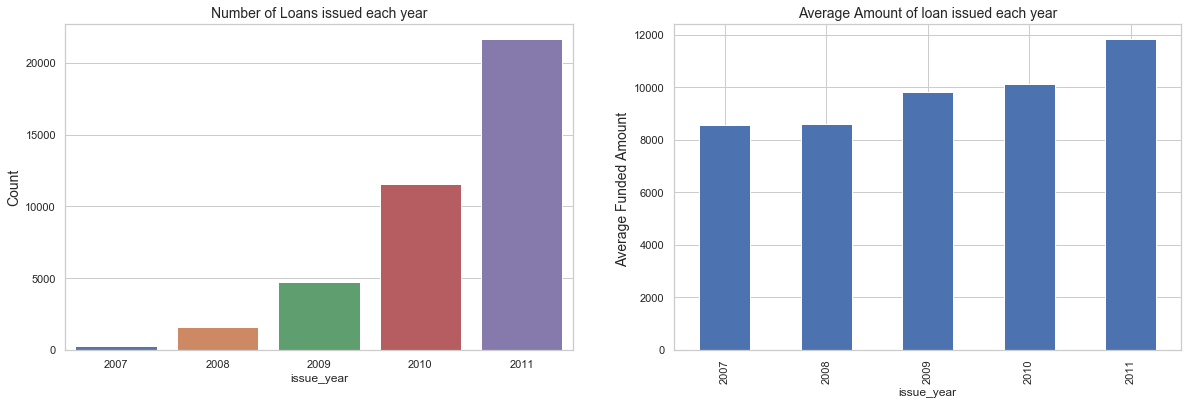

In [27]:
# PLot bar graph to analyse "Loan Issue Year".
plt.figure(figsize=(20,6))

# First Subplot to get count of Loans Issues each year.
plt.subplot(1,2,1)
plt.title('Number of Loans issued each year', fontsize=14)
sns.countplot(loan['issue_year'])
plt.ylabel('Count', fontsize=14)

# Second Subplot to get "Average Funded Amount" each year (Bivariate Analysis)
plt.subplot(1,2,2)
plt.title('Average Amount of loan issued each year', fontsize=14)
loan.groupby('issue_year')['funded_amnt'].mean().plot(kind='bar')
plt.ylabel('Average Funded Amount ', fontsize=14)

plt.show()

### Observation:
#### 1) Maximum amount and number of loans were given in year 2011.
#### 2) There is increase in "Number of loans" given and "Average amount of loan" given from year 2007 to 2011.

## Analyse "Rate of Interest" (i.e. 'int_rate')

In [28]:
# Change 'int_rate' datatype from 'Object' to 'float'.
loan['int_rate'] = loan['int_rate'].str.split('%',n=1,expand=True)[0].astype('float')

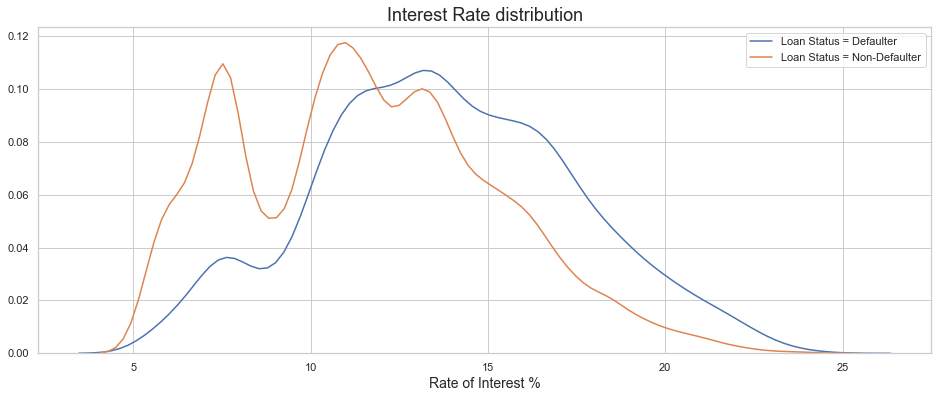

In [29]:
plt.figure(figsize=(16,6))

# Plot KDE plot to find Interest rate density.
plt.title('Interest Rate distribution',fontsize=18)
sns.kdeplot(loan.loc[loan['loan_status'] == 'Charged Off', 'int_rate'], label = 'Loan Status = Defaulter')
sns.kdeplot(loan.loc[loan['loan_status'] == 'Fully Paid', 'int_rate'], label = 'Loan Status = Non-Defaulter');
plt.xlabel('Rate of Interest %',fontsize=14)
plt.show()

In [30]:
# Get Range of 'int_rate'.
loan.int_rate.max(),loan.int_rate.min()

(24.59, 5.42)

In [31]:
# Create bins with difference of 1%, to find how many loans fall in which range of 'int_rate'.
# Create Derived column 'Interest Rate Bin' for bins of Interest Rate.

labels=['5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17',
'17-18','18-19','19-20','20-21','21-22','22-23','23-24','24-25']
loan['Interest Rate Bin'] = pd.cut(loan['int_rate'], [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],
                                  labels=labels)

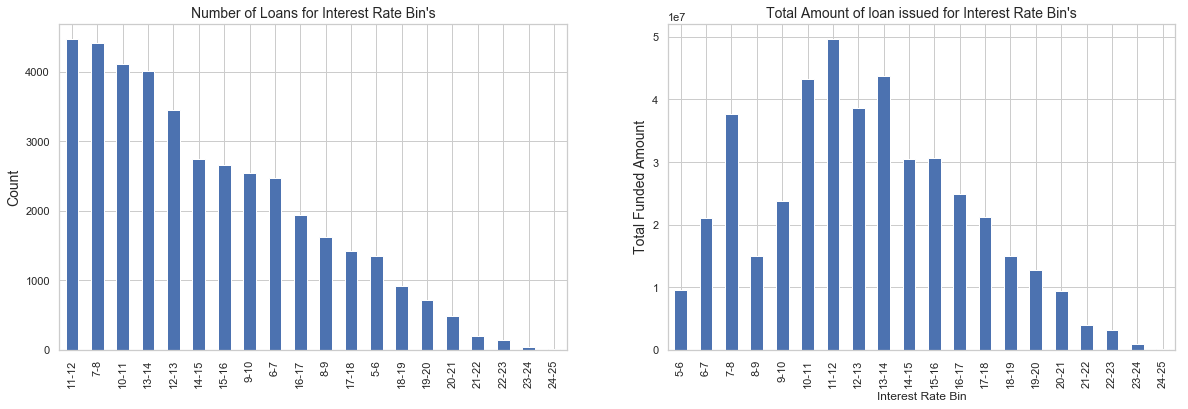

In [32]:
# Plot bar graph graph to get number of loans in each bins.
plt.figure(figsize=(20,6))

# First Subplot is to find "Number of Loans" issues in each Interest Rate bin.
plt.subplot(1,2,1)
plt.title("Number of Loans for Interest Rate Bin's", fontsize=14)
plt.ylabel('Count', fontsize=14)
loan['Interest Rate Bin'].value_counts().plot.bar()

# Second Subplot is to get "Average Funded Amount" each year (Bivariate Analysis)
plt.subplot(1,2,2)
plt.title("Total Amount of loan issued for Interest Rate Bin's", fontsize=14)
loan.groupby('Interest Rate Bin')['funded_amnt'].sum().plot.bar()
plt.ylabel('Total Funded Amount', fontsize=14)

plt.show()

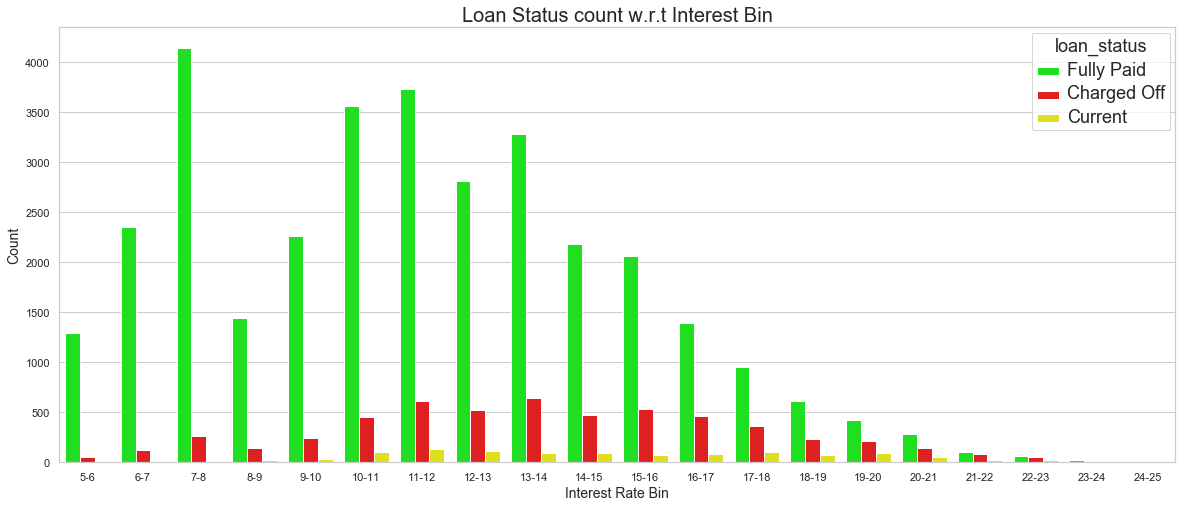

In [33]:
# Plot count of 'Interest Rate' with "Loan Status".

plt.figure(figsize=(20,8))

plt.title('Loan Status count w.r.t Interest Bin', fontsize='20')
palette = ['#00FF00','#FF0000','#FFFF00']
ax = sns.countplot(x='Interest Rate Bin', data=loan, hue='loan_status', palette=palette)

plt.setp(ax.get_legend().get_texts(), fontsize=18)
plt.setp(ax.get_legend().get_title(), fontsize=18)
plt.xlabel('Interest Rate Bin', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

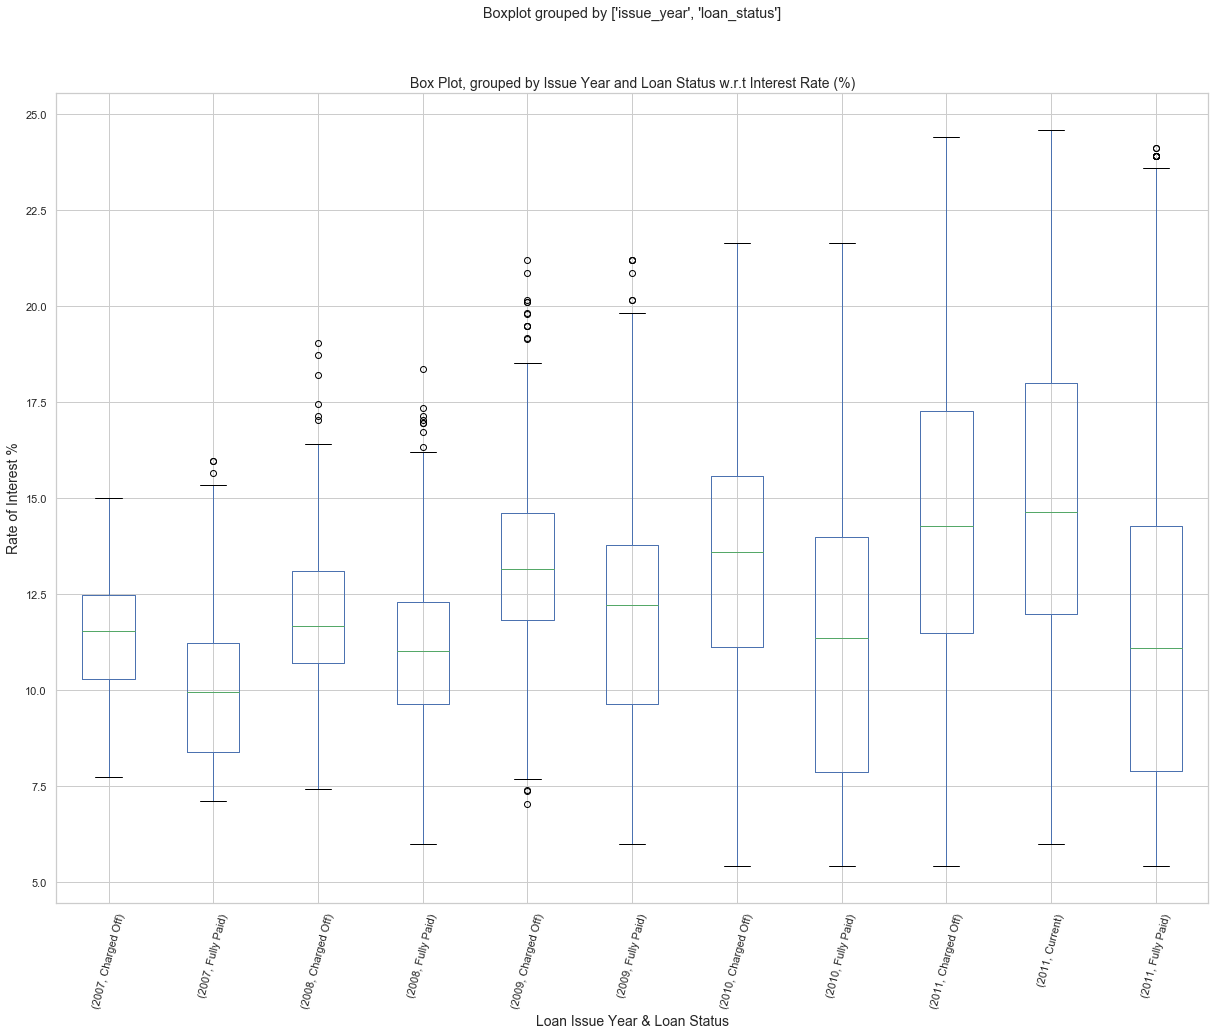

In [34]:
# int_rate across years
loan.boxplot(column=['int_rate'], by=['issue_year','loan_status'],figsize=(20,15))
plt.ylabel('Rate of Interest %', fontsize=14)
plt.xlabel('Loan Issue Year & Loan Status', fontsize=14)
plt.title('Box Plot, grouped by Issue Year and Loan Status w.r.t Interest Rate (%)', fontsize=14)
plt.xticks(rotation=75)   
plt.show()

### Observation:
##### 1) Density of Interest rates shows that, most of the Loans are gven at interest rate in between 11%-14%.
##### 2) Maximum "Funded Amount" has been lended at interest rate in between 11%-12%, followed by 13%-14%.
##### 3) Maximum number of loans has been "Charged Off" at interest rate in between 13%-14%.
##### 4) Median "interest rate" for "Charged Off" is "~14%", which is greater than Median "interest rate" for "Fully Paid" loans.
##### 5) Across all the years the "Charged Off" loans have a higher interest rates than the 'Fully Paid" loans.
##### 6) Current loans data is available only for year 2011, which has been given out at a considerably higher rate than the fully paid loans.

### Analyse "Loan Tenure" (i.e. 'term')

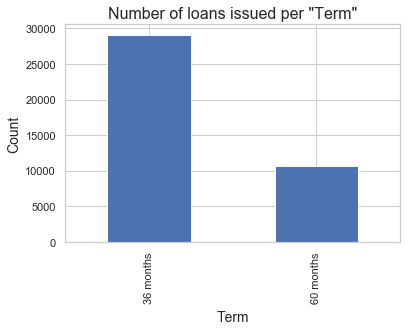

In [35]:
# Analyze Term column

loan['term'].value_counts().plot.bar()
plt.xlabel('Term', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of loans issued per "Term"', fontsize=16)
plt.show()

In [36]:
# Analyse loan status across term in % (% is taken column wise)

colr = sns.light_palette("orange", as_cmap=True)
(pd.crosstab(loan['loan_status'],loan['term'], 
             normalize='columns').round(4)*100).style.background_gradient(cmap=colr)

term,36 months,60 months
loan_status,,
Charged Off,11.09,22.6
Current,0,10.73
Fully Paid,88.91,66.67


### Analyze Income

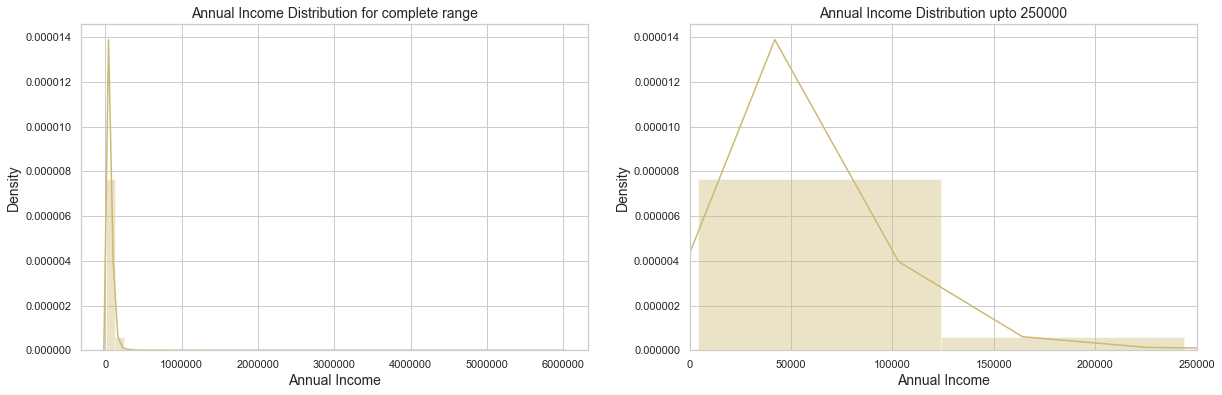

In [37]:
# Analyse Annual Income.

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title("Annual Income Distribution for complete range", fontsize=14)
sns.distplot(loan['annual_inc'], color='y')
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("Density", fontsize=14)

plt.subplot(1,2,2)
plt.title("Annual Income Distribution upto 250000", fontsize=14)
sns.distplot(loan['annual_inc'], color='y')
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xlim(0,250000)

plt.show()

In [38]:
# Find 33, 66 and 99 percentile to create Income range of "Low, Medium and high" and left over will be "Outler"
np.percentile(loan.annual_inc,33),np.percentile(loan.annual_inc,66),np.percentile(loan.annual_inc,99)

(46297.12, 72000.0, 234999.36)

In [39]:
# Create bins which is close enough to bove percentile.
# Create new Derived Metric ("Income Level")
loan['Income Level'] = pd.cut(loan.annual_inc, [0,50000,75000,250000,6000000], labels=['Low', 'Medium', 'High', 'Outlier'])

In [40]:
# Analyse total Income distribution accross Loan status and Income Level, in (%)
colr = sns.light_palette("orange", as_cmap=True)
(pd.crosstab(loan.loan_status, loan['Income Level'], normalize='columns',
            margins=True, margins_name='Total').round(4)*100).style.background_gradient(cmap=colr)

Income Level,Low,Medium,High,Outlier,Total
loan_status,,,,,
Charged Off,16.6,14.02,11.14,10.26,14.17
Current,2.25,2.98,3.58,2.98,2.87
Fully Paid,81.15,83,85.28,86.75,82.96


In [41]:
# Mean "Funded Amount" per Income Level w.r.t Loan Status.
colr = sns.light_palette("orange", as_cmap=True)
(pd.crosstab(loan.loan_status, loan['Income Level'], values=loan.funded_amnt, 
             aggfunc='mean',margins=True, margins_name='Total').round(2)).style.background_gradient(cmap = colr)

Income Level,Low,Medium,High,Outlier,Total
loan_status,,,,,
Charged Off,8386.02,12869,16900.7,19557.3,11753.4
Current,11980.2,16430.8,20204,24111.1,16485.7
Fully Paid,7620.83,10798.9,14077.5,18827.4,10618.5
Total,7846.12,14611.3,11257.2,19059.8,10947.7


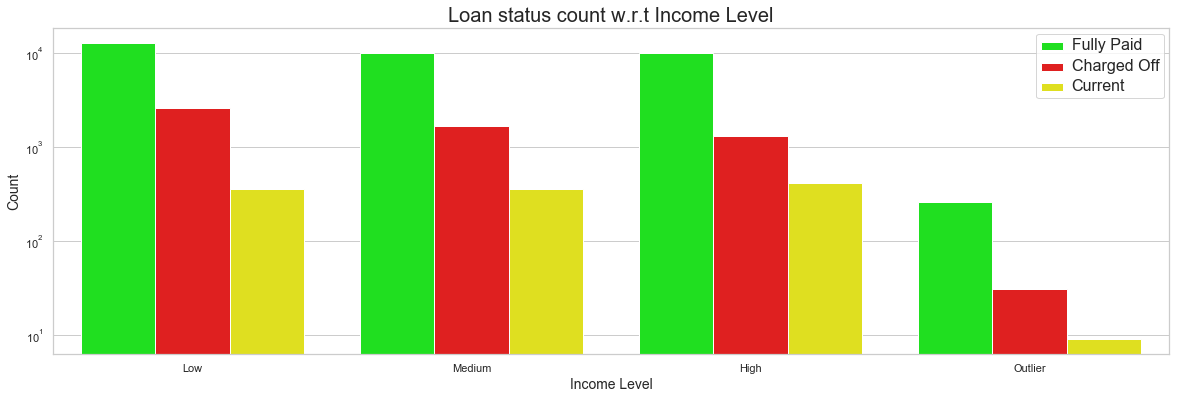

In [42]:
# Plot above data.

plt.figure(figsize=(20,6))
sns.set(style="whitegrid")

plt.title('Loan status count w.r.t Income Level', fontsize='20')
palette = ['#00FF00','#FF0000','#FFFF00']
ax = sns.countplot(x='Income Level', data=loan, hue='loan_status', palette=palette)
plt.yscale('log')
plt.xlabel("Income Level", fontsize=14)
plt.ylabel("Count", fontsize=14)

ax.legend(loc='upper right')

plt.setp(ax.get_legend().get_texts(), fontsize=16)

plt.show()

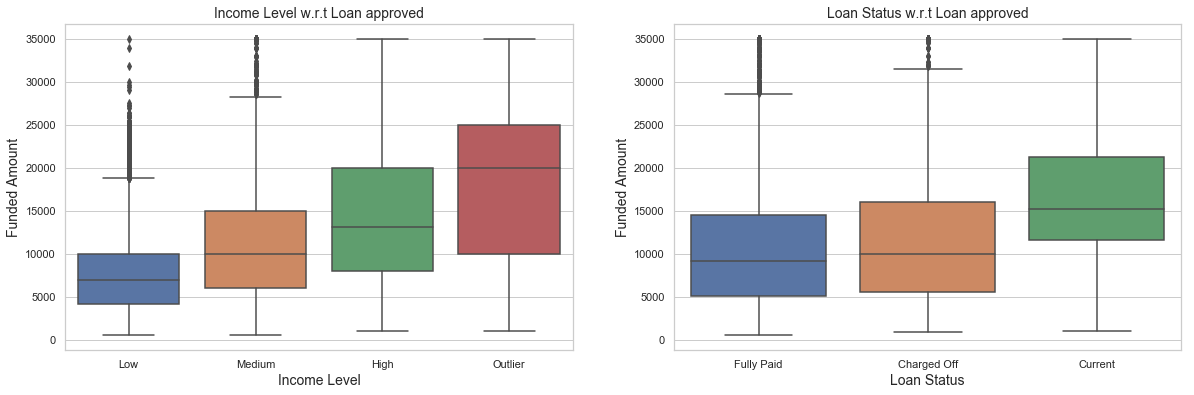

In [43]:
# Plot Income level to Funded Amount

plt.figure(figsize=(20,6))
sns.set(style="whitegrid")

# First Subplot 
plt.subplot(1,2,1)
plt.title('Income Level w.r.t Loan approved', fontsize=14)
ax1 = sns.boxplot(x=loan['Income Level'],y=loan['funded_amnt'])
ax1.set_xlabel('Income Level', fontsize=14)
ax1.set_ylabel('Funded Amount', fontsize=14)

# Second Subplot
plt.subplot(1,2,2)
plt.title('Loan Status w.r.t Loan approved', fontsize=14)
ax2 = sns.boxplot(x=loan['loan_status'],y=loan['funded_amnt'])
ax2.set_xlabel('Loan Status', fontsize=14)
ax2.set_ylabel('Funded Amount', fontsize=14)

plt.show()

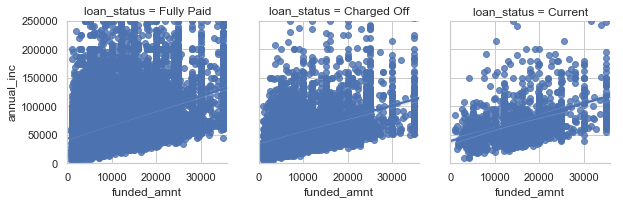

In [44]:
# Analyse loan for people with annual income below 250000.

a = sns.FacetGrid(loan, col="loan_status") 
a.map(sns.regplot, "funded_amnt", "annual_inc")
plt.xlim(0, 36000) 
plt.ylim(0, 250000)

plt.show()

### Observation:
##### 1) Out of total Annual Income, 99% of annual income is below 240000.
##### 2) "Charged Off %" is decreasing when "Income level" is increaing (i.e. Low to Medium to High to Outlier)
##### 3) As "Income Level" increases, Mean and Median "Funded Amount" also increases.
##### 4) Most of the "Charged Off" loan is for borrowers with Annual Income below 125000 and Funded Amount below 25000.

### Analyze Home Ownership

In [45]:
# Analyze Home Ownership w.r.t Loan Status. % is calculated based on each category of home_ownership.

colr = sns.light_palette("yellow", as_cmap=True)
(pd.crosstab(loan.loan_status, loan.home_ownership, 
             normalize='columns').round(4)*100).style.background_gradient(cmap = colr)

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,
Charged Off,13.18,0,18.37,14.49,15.02
Current,3.61,0,0,2.71,2.22
Fully Paid,83.21,100,81.63,82.8,82.76


In [46]:
# Analyze Home Ownership w.r.t Loan Status. Count is represented in % w.r.t entire data.

colr = sns.light_palette("yellow", as_cmap=True)
(pd.crosstab(loan.loan_status, loan.home_ownership, 
             normalize='all').round(4)*100).style.background_gradient(cmap = colr)

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,
Charged Off,5.86,0,0.05,1.12,7.15
Current,1.61,0,0,0.21,1.05
Fully Paid,37,0.01,0.2,6.38,39.38


### Observation:
##### 1) All % are approximately same when % is calculated w.r.t home ownership category except for None.
##### 2) Overall, "Charged off" is high in Mortgage and Rent.

### Analyze Purpose

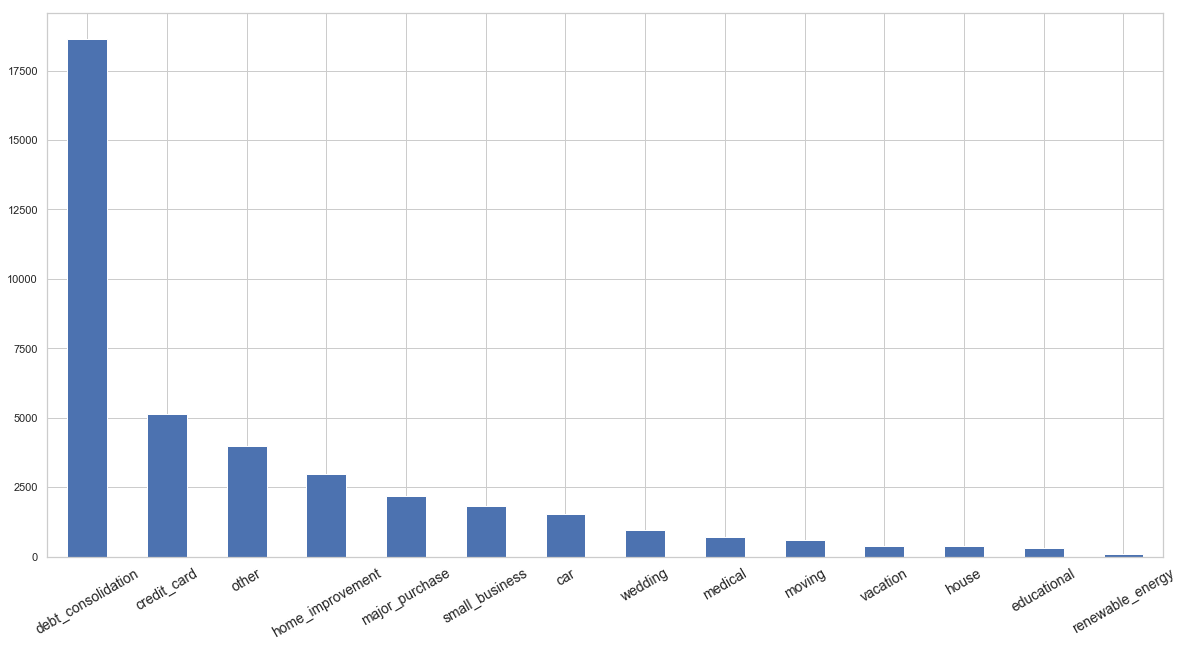

In [47]:
plt.figure(figsize=(20,10))

loan.purpose.value_counts().plot.bar()
plt.xticks(rotation=30, fontsize=14)
plt.show()

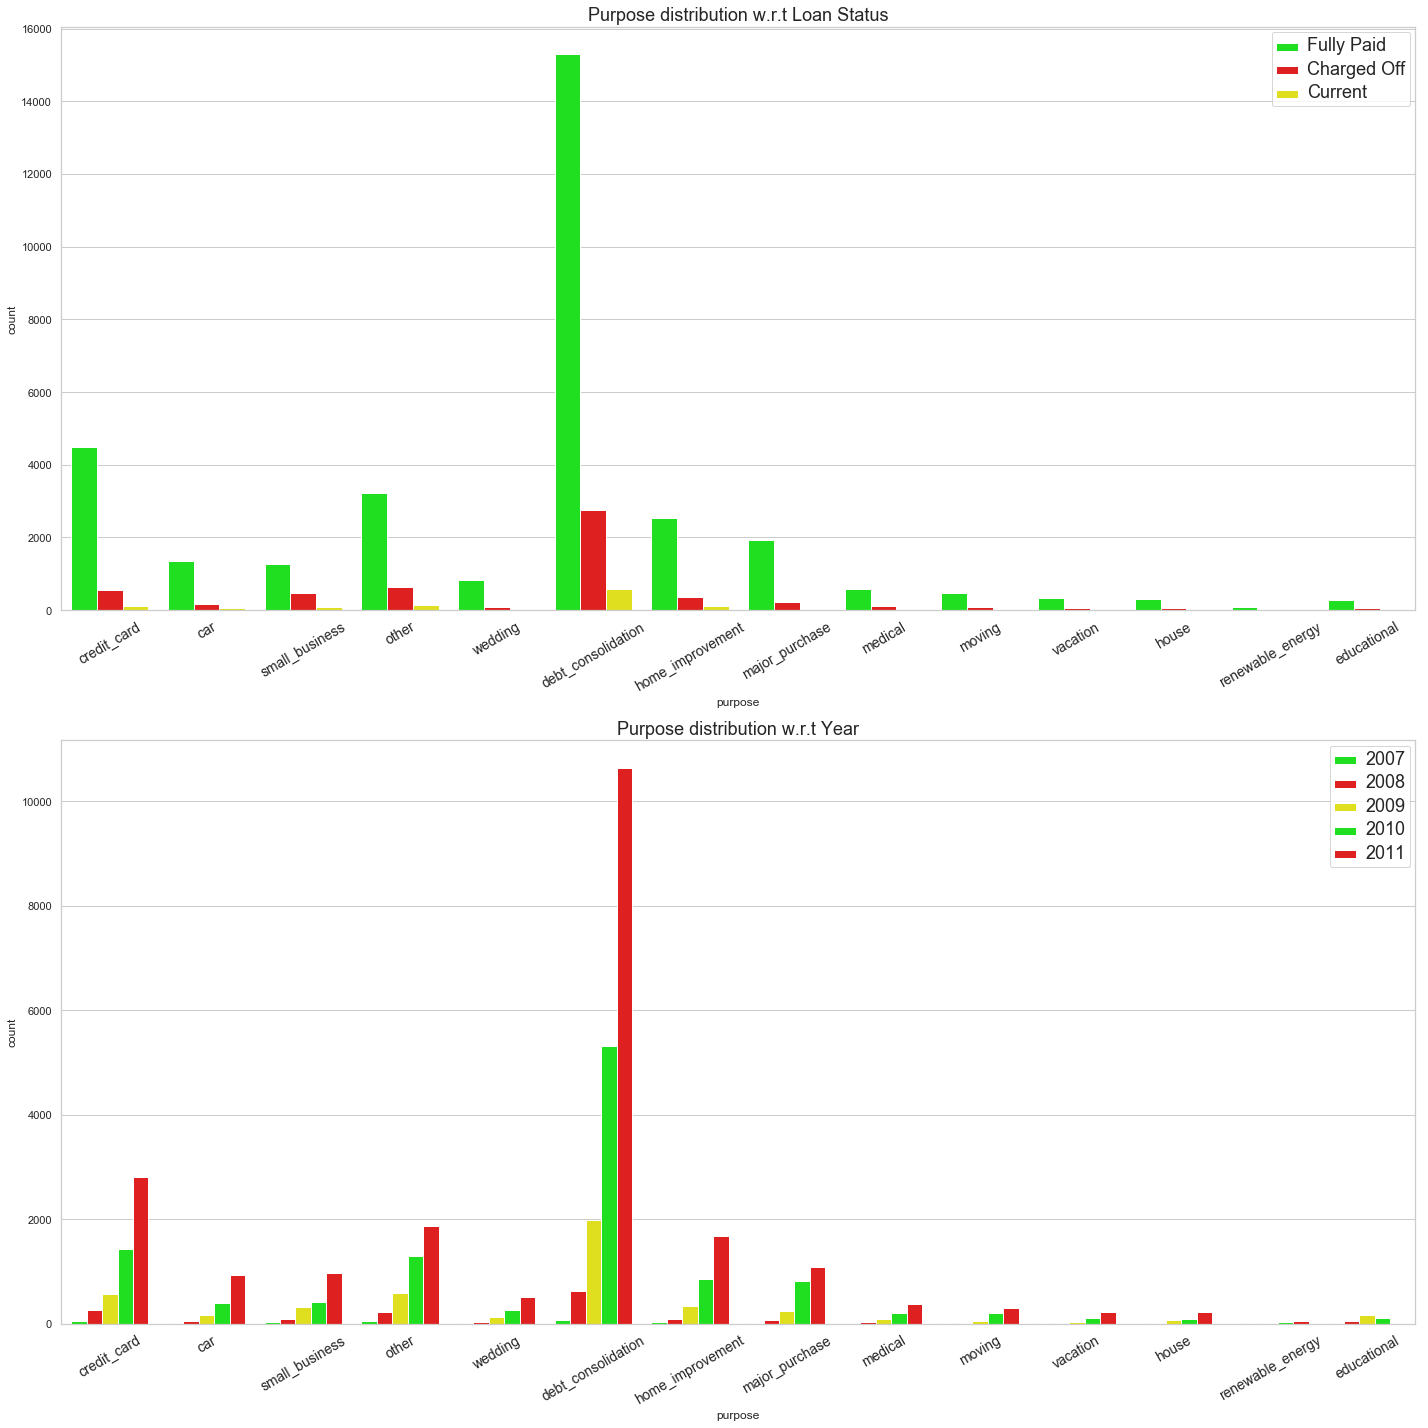

In [48]:
# Add graph for each purpose.

plt.figure(figsize=(20,20))

plt.subplot(211)
ax1=sns.countplot(x='purpose', data=loan, hue='loan_status', palette=palette)

plt.title("Purpose distribution w.r.t Loan Status", fontsize=18)
plt.xticks(rotation=30, fontsize=14)
ax1.legend(loc='upper right')
plt.setp(ax1.get_legend().get_texts(), fontsize=18)


plt.subplot(212)
ax2=sns.countplot(x='purpose', data=loan, hue='issue_year', palette=palette)

plt.title("Purpose distribution w.r.t Year", fontsize=18)
plt.xticks(rotation=30, fontsize=14)
ax2.legend(loc='upper right')
plt.setp(ax2.get_legend().get_texts(), fontsize=18)

plt.tight_layout()
plt.show()

In [49]:
# Analyze Purpose w.r.t Loan Status in %.

colr = sns.light_palette("yellow", as_cmap=True)
(pd.crosstab(loan.purpose, [loan.loan_status], 
             normalize='all', margins=True, margins_name='Total').round(4)*100).style.background_gradient(cmap = colr)

loan_status,Charged Off,Current,Fully Paid,Total
purpose,,,,
car,0.4,0.13,3.37,3.9
credit_card,1.36,0.26,11.29,12.92
debt_consolidation,6.97,1.48,38.49,46.93
educational,0.14,0,0.68,0.82
home_improvement,0.87,0.25,6.37,7.49
house,0.15,0.04,0.78,0.96
major_purchase,0.56,0.09,4.85,5.51
medical,0.27,0.03,1.45,1.74
moving,0.23,0.02,1.22,1.47


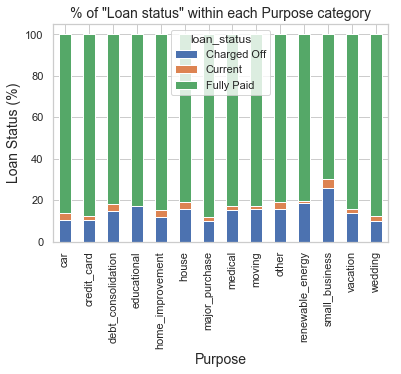

In [50]:
# Plot graph to analyse each purpose in w.r.t loan category in %.

pd.crosstab(loan.purpose,loan.loan_status).apply(lambda x :x/x.sum()*100,axis=1).plot.bar(stacked=True)
plt.xlabel('Purpose', fontsize=14)
plt.ylabel("Loan Status (%)", fontsize=14)
plt.title('% of "Loan status" within each Purpose category', fontsize=14)

plt.show()

### Observation:
##### 1) Debt Consolidation has maximum number of loans in all three catogories (i.e. Charged Off, Current and Fully Paid)
##### 2) Debt Consolidation has maximum number (46.9 %) of loans in all three catogories every Year.
##### 3) Debt Consolidation count is increaing Inceremntly each year across all three Loan Status Categories.
##### 4) Within each Purpose categories, Small business has highest percentage (~ 25%) of "Charged Off" loans.

### Analyse "Debt-to-Income Ratio" (i.e. 'dti')

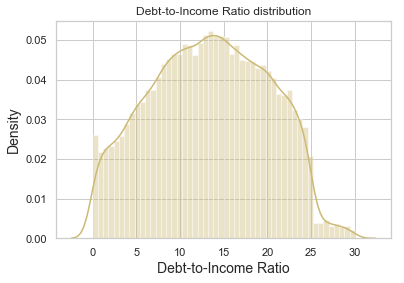

In [51]:
# Analyse 'dti' variable
plt.title("Debt-to-Income Ratio distribution")
sns.distplot(loan['dti'], color='y')
plt.xlabel('Debt-to-Income Ratio', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

In [52]:
# Creating bins for 'dti'
loan['dti_groups'] = pd.cut(loan.dti,
                     bins=list(range(0,31,5)),
                     labels=["0-5", "5-10", "10-15", "15-20","20-25","25-30"])

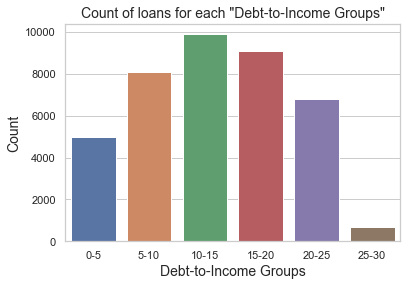

In [53]:
# Plotting dti as countplot and stacked-bar with hue= loan_status

sns.countplot(data=loan, x='dti_groups')
plt.xlabel('Debt-to-Income Groups', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of loans for each "Debt-to-Income Groups"', fontsize=14)

plt.show()

In [54]:
# Creating a crosstab between dti bins and default_status
pd.crosstab(loan.dti_groups,[loan.default_status], normalize='columns').round(4)*100

default_status,Defaulted,Non-Defaulted
dti_groups,,
0-5,10.66,12.91
5-10,17.95,20.82
10-15,25.04,25.04
15-20,24.81,22.71
20-25,19.97,16.79
25-30,1.55,1.74


### Observation:
##### Maximum no of loans were given for dti-range 10-15.
##### For each dti_groups, difference between % Defaulted and % Not-Defaulted is minimal.

#### Let's analyse Small Business further.

In [55]:
#Filtering the data for small business
loan_purpose_small_bussns = loan[loan.purpose.isin(['small_business'])]

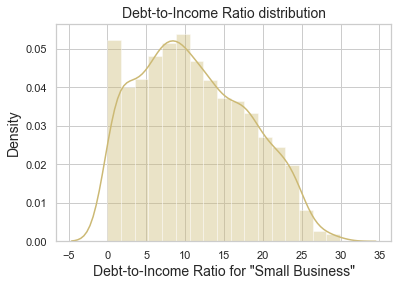

In [56]:
# Analyse 'dti' for small business.
plt.title("Debt-to-Income Ratio distribution", fontsize=14)
sns.distplot(loan_purpose_small_bussns['dti'], color='y')
plt.xlabel('Debt-to-Income Ratio for "Small Business"', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

##### About 75% people taking loan for purpose of small business have dti <=16.4.

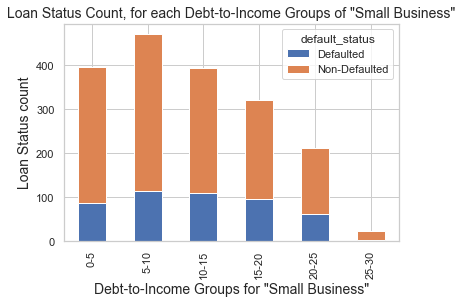

In [57]:
pd.crosstab(loan_purpose_small_bussns.dti_groups,loan_purpose_small_bussns.default_status).plot.bar(stacked=True)
plt.xlabel('Debt-to-Income Groups for "Small Business"', fontsize=14)
plt.ylabel('Loan Status count', fontsize=14)
plt.title('Loan Status Count, for each Debt-to-Income Groups of "Small Business"', fontsize=14)

plt.show()

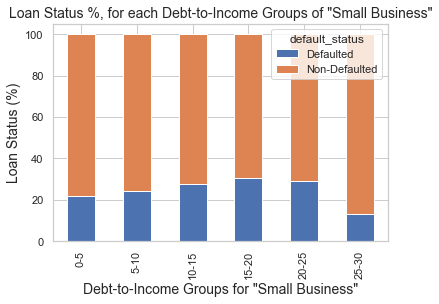

In [58]:

pd.crosstab(loan_purpose_small_bussns.dti_groups,
            loan_purpose_small_bussns.default_status).apply(lambda r:r/r.sum()*100, axis=1).plot.bar(stacked=True)
plt.xlabel('Debt-to-Income Groups for "Small Business"', fontsize=14)
plt.ylabel('Loan Status (%)', fontsize=14)
plt.title('Loan Status %, for each Debt-to-Income Groups of "Small Business"', fontsize=14)

plt.show()

##### For small business % defaulters is highest in the dti range 20-25

### Analyze "Verification status" of Income

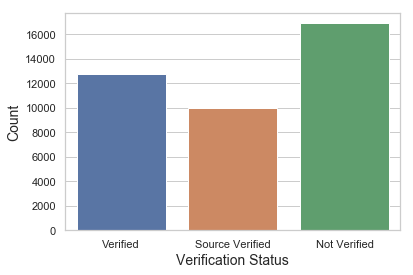

In [59]:
# Analyse variable 'verification_status'

sns.countplot(data=loan, x='verification_status')
plt.xlabel('Verification Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

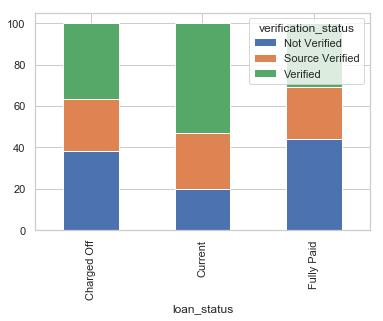

In [60]:
# Analyze Verification status w.r.t Loan status. Here % is calculated on Loan Status category (i.e. At row level)

(pd.crosstab(loan.loan_status, loan.verification_status, 
             normalize='index').round(4)*100).plot.bar(stacked=True)

plt.show()

In [61]:
# Analyze 'Loan Status' w.r.t 'Verification status'. Here % is calculated on Verification Status category (i.e. At Column level)

colr = sns.light_palette("yellow", as_cmap=True)
(pd.crosstab(loan.loan_status, loan.verification_status, 
             normalize='columns').round(4)*100).style.background_gradient(cmap = colr)


verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,12.66,14.36,16.01
Current,1.34,3.1,4.71
Fully Paid,86,82.54,79.28


### Observation:
##### 1) Out of "Total Charged Off" Loans, or "Bad loan", for 36% loan, Income is Verified and for 25.5% loan, Income is Source Verified.
##### 2) Out of "Total Charged Off" Loans, or "Bad loan", for 38% loan, Income is Not Verified.
##### 3) Percentage of defaulters is similar across all the categories for 'verification_status'.

#### Let's analyse this further by filtering the data for "Defaulted"

In [62]:
#Filtering data for defaulters
loan_default_status_filtered = loan[loan['default_status']=='Defaulted']

#Creating column 'verified' from 'verification_status'. Values 'verified and source verified' can be grouped together
loan_default_status_filtered['verified'] = loan['verification_status'].apply(lambda x: 'Not verified' if x=='Not Verified' else 'Verfied')


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [63]:
# Analyse dti-range for Income Verified or Not Verified.

pd.crosstab(loan_default_status_filtered.dti_groups,
            loan_default_status_filtered.verified).apply(lambda r :r/r.sum()*100,axis=1)

verified,Not verified,Verfied
dti_groups,,
0-5,40.703518,59.296482
5-10,37.114428,62.885572
10-15,37.446505,62.553495
15-20,39.740821,60.259179
20-25,36.672630,63.327370
25-30,25.287356,74.712644


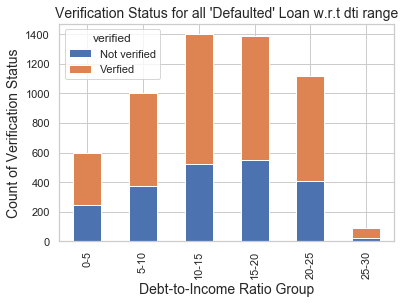

In [64]:
# Plot Stacked bar to show Verification Status for all 'Defaulted' Loan w.r.t dti range.

pd.crosstab(loan_default_status_filtered.dti_groups,[loan_default_status_filtered.verified]).plot.bar(stacked=True)
plt.xlabel('Debt-to-Income Ratio Group', fontsize=14)
plt.ylabel('Count of Verification Status', fontsize=14)
plt.title("Verification Status for all 'Defaulted' Loan w.r.t dti range", fontsize=14)
plt.show()

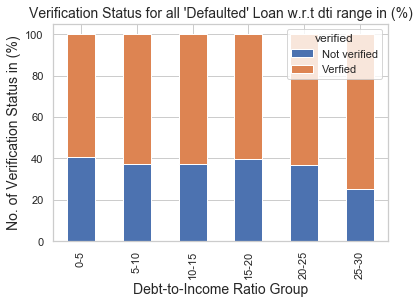

In [65]:
# Plot Stacked bar to show Verification Status for all 'Defaulted' Loan w.r.t dti range in %.

pd.crosstab(loan_default_status_filtered.dti_groups,
            loan_default_status_filtered.verified).apply(lambda r :r/r.sum()*100,axis=1).plot.bar(stacked=True)
plt.xlabel('Debt-to-Income Ratio Group', fontsize=14)
plt.ylabel('No. of Verification Status in (%)', fontsize=14)
plt.title("Verification Status for all 'Defaulted' Loan w.r.t dti range in (%)", fontsize=14)
plt.show()

### Observation:
##### 1) We had earlier found that percentage of defaulters is highest for dti range 10-15.
##### 2) From the above it is clear that percentage of unverified loans is highest in the dti range 0-5 closely followed by dti-range 10-15.
##### 3) It can be observed that people with dti in the range of dti 10-15 with an unverified income have a higher chance of defaulting.
##### 4) It can be observed that higher the "dti", higher is the verification percentage.

### Analyse "Region" (Derived metric from "addr_state")

In [66]:
# Analysis by region
# Importing data from https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv
# State codes in 'addr_state' have been mapped to 'Regions' in 'United States'. Data gathered from the above link.

# intialise data of lists. 
data = {'addr_state' : ['AK','AL','AR','AZ','CA','CO','CT','DC','DE','FL','GA','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VA','VT','WA','WI','WV','WY'], 'Region' : ['West','South','South','West','West','West','Northeast','South','South','South','South','West','Midwest','West','Midwest','Midwest','Midwest','South','South','Northeast','South','Northeast','Midwest','Midwest','Midwest','South','West','South','Midwest','Midwest','Northeast','Northeast','West','West','Northeast','Midwest','South','West','Northeast','Northeast','South','Midwest','South','South','West','South','Northeast','West','Midwest','South','West']}

# Create DataFrame 
loan_region = pd.DataFrame(data) 


In [67]:
# Import Region column from Dataframe "loan_region"
loan_with_regions = loan.merge(loan_region, how="inner", on='addr_state')

In [68]:
# Copy temporary dataframe to main dataframe 'loan'
loan = loan_with_regions

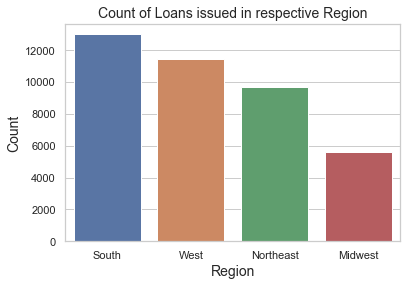

In [69]:
# Plot count of Loans issued in respective Region.
sns.countplot(data=loan, x='Region', order=loan['Region'].value_counts().index)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Count of Loans issued in respective Region", fontsize=14)
plt.show()

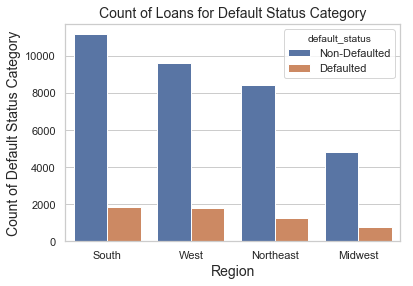

In [70]:
# Plot Count of Loans for Default Status Category

sns.countplot(data=loan, x='Region', 
              hue='default_status',order=loan['Region'].value_counts().index)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Count of Default Status Category", fontsize=14)
plt.title("Count of Loans for Default Status Category", fontsize=14)
plt.show()

In [71]:
# Analyse Income Level, Region with Loan Status. This is normalized % accross Data Set.

colr = sns.light_palette("orange", as_cmap=True)
(pd.crosstab([loan['Income Level'], loan.Region], loan.loan_status, 
             normalize='all').round(4)*100).style.background_gradient(cmap = colr)

### Observation:
##### 1) About 33% of the loans have been granted in the Southern Region
##### 2) Maximum number of defaulters are from Southern region.
##### 3) There is a consistent decline in "Defaulters" and Non-"Defaulters" from "South" to "West" to "Northeast" to "Midwest".

### Analyse Address State (i.e. 'addr_state')

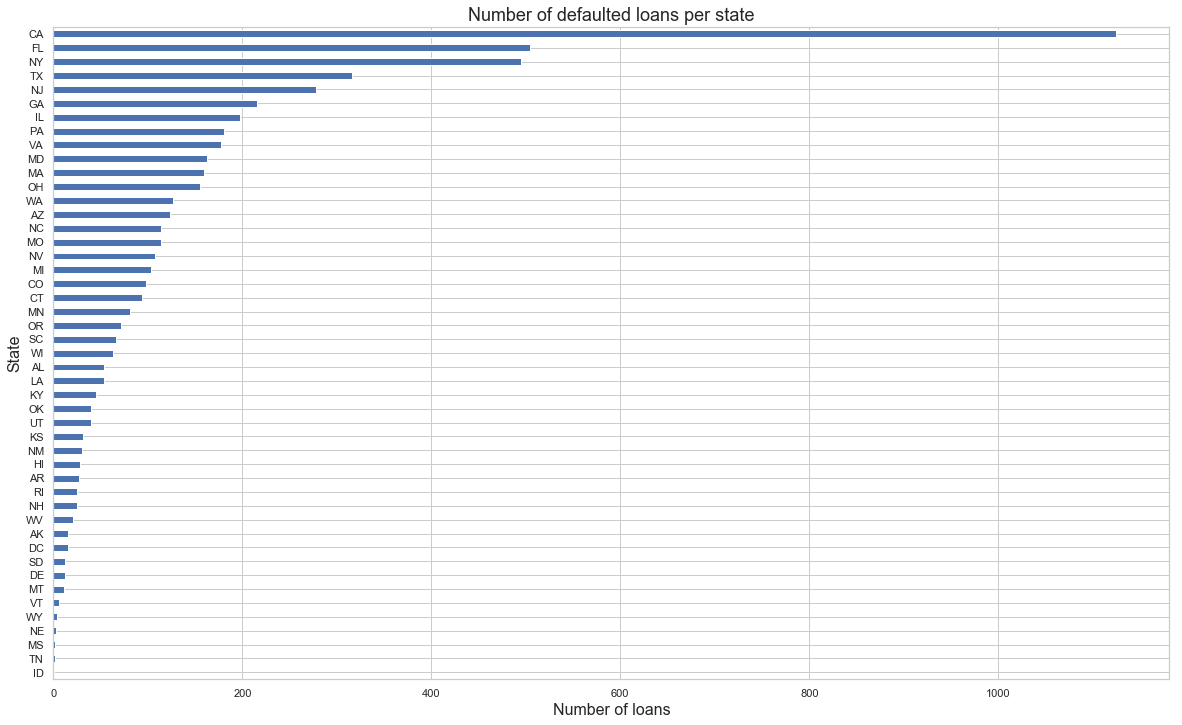

In [72]:
# Plot Total Defaulted loans for each state
plt.figure(figsize=(20,12))

loan[loan['default_status']=='Defaulted'].groupby('addr_state')['default_status'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=16)
plt.xlabel('Number of loans',fontsize=16)
plt.title('Number of defaulted loans per state',fontsize=18);


In [73]:
# Let's analyze Address State w.r.t "Default Status" in % term. Plot is normalized accross column.

colr = sns.light_palette("orange", as_cmap=True)
(pd.crosstab(loan.addr_state, loan.default_status, normalize='columns').round(4)*100).style.background_gradient(cmap = colr)

default_status,Defaulted,Non-Defaulted
addr_state,,
AK,0.27,0.19
AL,0.96,1.17
AR,0.48,0.64
AZ,2.19,2.22
CA,19.99,17.52
CO,1.74,2.04
CT,1.67,1.93
DC,0.27,0.58
DE,0.21,0.3


### Observation:
##### 1) Most Number of loans are defaulted in California.
##### 2) State where most number of loans have defaulted, in same state most numbers of loan has been "Fully Paid".
##### 3) This variable cannot be important factor to determine target variable.

### Analyze Grade

In [74]:
# Average salary for each Grade, w.r.t Loan status(i.e. Charged Off, Current, Fully Paid)

colr = sns.light_palette("orange", as_cmap=True)
(pd.crosstab(loan.grade, loan.loan_status, values=loan.annual_inc, 
             aggfunc='median',margins=True, margins_name='Total').round(2)).style.background_gradient(cmap = colr)

loan_status,Charged Off,Current,Fully Paid,Total
grade,,,,
A,45748,53500,59000,57600
B,50000,63000,59002,57989.5
C,50000,63750,57000,56000
D,54000,58000,60000,59000
E,60000,68000,65856,65000
F,67000,85000,74500,72000
G,67032,86400,85000,80000
Total,53000,65000,60000,59000


In [75]:
# Number of Loans w.r.t Grade and Loan Status in %.
colr = sns.light_palette("orange", as_cmap=True)
(pd.crosstab(loan.grade, loan.loan_status, normalize='all').round(4)*100).style.background_gradient(cmap = colr)

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,1.52,0.1,23.78
B,3.59,0.87,25.81
C,3.39,0.66,16.33
D,2.81,0.56,9.99
E,1.8,0.45,4.9
F,0.8,0.18,1.65
G,0.25,0.04,0.5


In [76]:
# Number of Loans w.r.t Grade, Year and Loan Status in %.
color = sns.light_palette("yellow", as_cmap=True)
(pd.crosstab(loan.grade, [loan.loan_status,loan.issue_year], normalize='all').round(4)*100).style.background_gradient(cmap = colr)

### Observation:
##### 1) Borrowers with G grade are with highest Median salary and A being Lowest.
##### 2) There is Gradual decrease in loan status (including Charged Off) as we move  from Grade B to G.
##### 3) There is Gradual Increase in Number of loans in each category of Loan Status from left to right.

### Analyse Employee Length (i.e. emp_length)

In [77]:
# Analyse Employee Length.

# Clean column value by removing years.
loan['emp_length'] = loan.emp_length.str.split(' year',n=1,expand=True)[0]

# Replace experience < 1 to 0-1.
loan['emp_length'] = loan['emp_length'].replace('< 1', '0-1')

In [78]:
# Analyse loan status accross Employee length. % is taken for each emp_length ccategory (i.e. column wise)

(pd.crosstab([loan.loan_status], loan.emp_length, normalize='columns').round(4)*100).style.background_gradient(cmap = colr)

emp_length,0-1,1,10+,2,3,4,5,6,7,8,9
loan_status,,,,,,,,,,,
Charged Off,13.94,14.07,14.99,12.92,13.55,13.45,13.95,13.77,14.83,13.73,12.56
Current,1.64,2.19,4.4,2.21,2.03,2.74,2.68,2.74,3.5,2.97,2.54
Fully Paid,84.42,83.73,80.61,84.87,84.42,83.82,83.36,83.49,81.67,83.3,84.9


In [79]:
# Analyse only Charged off loans.

# Filter charged off loan.
loan_defaulter = loan.loc[loan['loan_status'] == 'Charged Off']

(pd.crosstab([loan_defaulter['Income Level']], 
             loan_defaulter.emp_length).round(4)*100).style.background_gradient(cmap = colr)

emp_length,0-1,1,10+,2,3,4,5,6,7,8,9
Income Level,,,,,,,,,,,
Low,38500,25100,38600,32400,26500,22700,20700,13400,12200,8000,5700
Medium,13400,12400,52200,14800,17400,12200,13600,8800,7700,6200,6100
High,11800,8000,41100,9300,11300,10900,11300,8300,6300,6100,3900
Outlier,200,100,1200,200,300,400,200,200,100,0,100


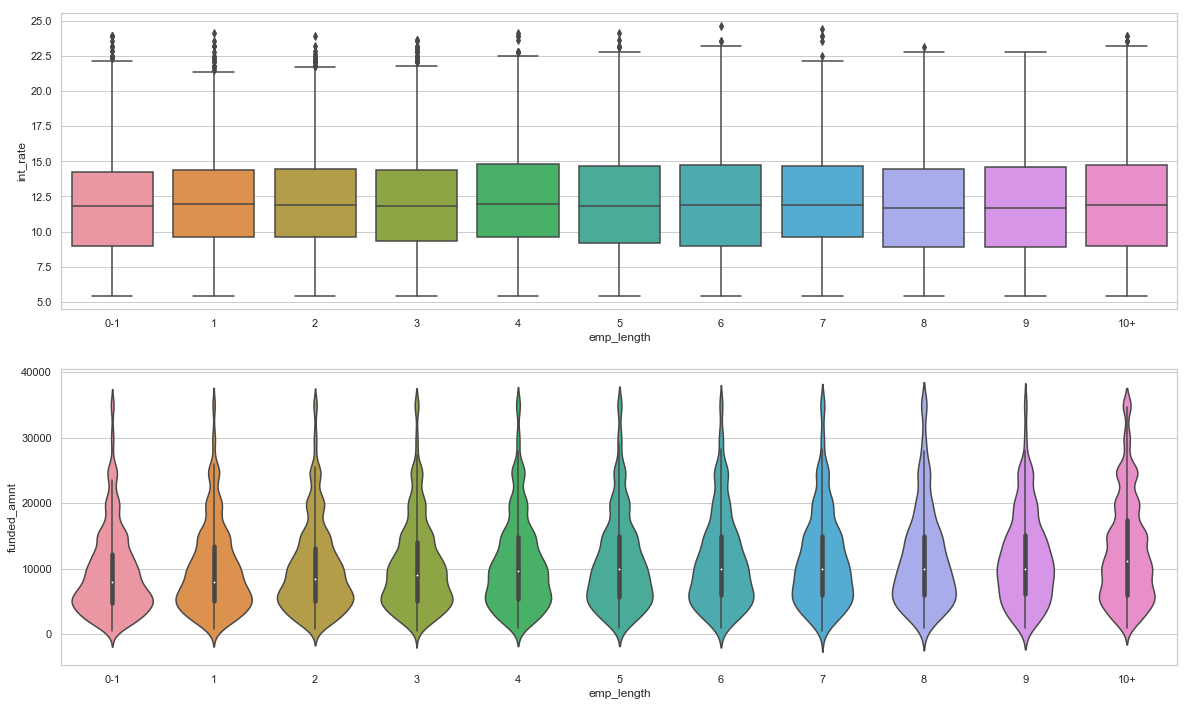

In [80]:
# Plot Employee length w.r.t Interest Rate and Funded amount.
fig, axs = plt.subplots(2,1, figsize=(20,12))

a = sns.boxplot(data=loan, x="emp_length", y="int_rate", ax=axs[0],
               order=['0-1','1','2','3','4', '5','6', '7', '8','9','10+'])

b = sns.violinplot(x="emp_length", y="funded_amnt",data=loan, ax=axs[1],
               order=['0-1','1','2','3','4','5','6','7','8','9','10+'])

plt.show()

### Observation:
##### Most of the Defaulters are with Experience 10+, followed by Borrowers with Experience between 0-1.
##### Borrowers with Annual Income less that 50000 have defaulted the most (i.e. Income level is 'Low')

### Analyse Installment

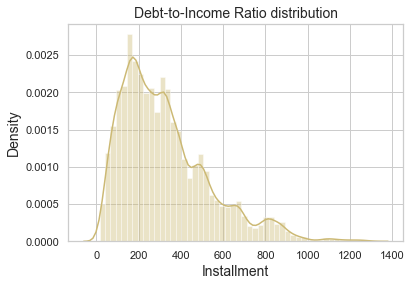

In [81]:
# Analyse Installemnt
plt.title("Debt-to-Income Ratio distribution", fontsize=14)
sns.distplot(loan['installment'], color='y')
plt.xlabel('Installment', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

In [82]:
# Create bins for installment range.
loan['installment_bracket'] = pd.cut(loan.installment, [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1306])

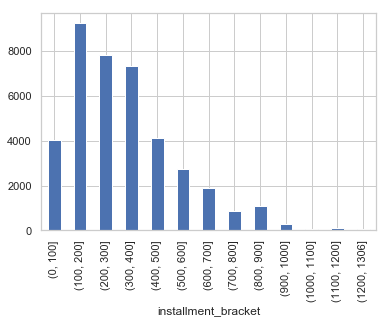

In [83]:
loan.groupby('installment_bracket')['loan_status'].count().plot.bar(stacked=True)
plt.show()

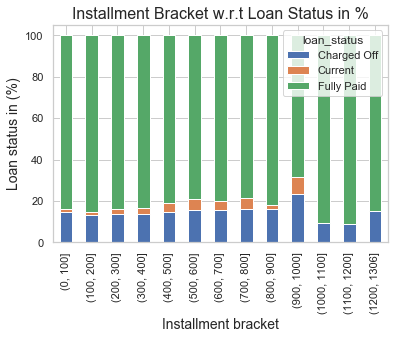

In [84]:
# Plot Installment Bucket w.r.t Loan Status

(pd.crosstab(loan.installment_bracket, loan.loan_status, normalize='index').round(4)*100).plot.bar(stacked=True)
plt.title("Installment Bracket w.r.t Loan Status in %", fontsize=16)
plt.xlabel("Installment bracket", fontsize=14)
plt.ylabel("Loan status in (%)", fontsize=14)

plt.show()

### Observation:
##### 1) Most number of installments are in range 100-400.
##### 2) We can see that Defaulters are consistant accross Installment bucket with minor fluctation at higher side.

### Analyse revol_util

In [85]:
# Replacing nan with 0 as we do not know the revolving utilizationa rate.
# we are considering that the records with nan values have not taken any loans.
loan["revol_util"] = [0 if pd.isna(x) else float(x.split("%")[0]) for x in loan.revol_util]

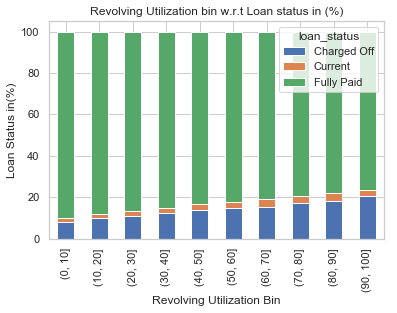

In [86]:
# Create bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Plot Revolving Utilization.
loan['revol_util_binned'] = pd.cut(loan.revol_util, bins)
pd.crosstab(loan.revol_util_binned, [loan.loan_status]).apply(lambda x: x/x.sum()*100, 
                                                            axis=1).plot.bar(stacked=True)
plt.title('Revolving Utilization bin w.r.t Loan status in (%)')
plt.xlabel('Revolving Utilization Bin')
plt.ylabel('Loan Status in(%)')
plt.show()

### Observation:
##### The lower the utilization of Total loan, the lower chances are of defaulting.

### Analysing revol_bal

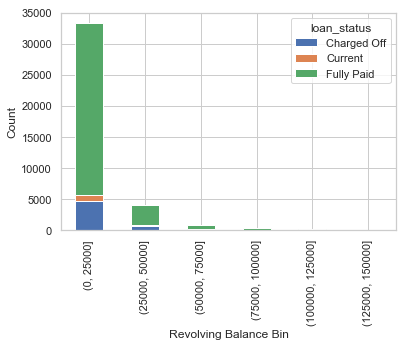

In [87]:
# Create bins
bins = [0, 25000, 50000, 75000, 100000, 125000 ,150000]
loan['revol_bal_binned'] = pd.cut(loan.revol_bal, bins)
pd.crosstab(loan.revol_bal_binned, [loan.loan_status]).plot.bar(stacked=True)
plt.xlabel('Revolving Balance Bin')
plt.ylabel('Count')
plt.show()

### Observations:
##### Most of the charged off loans are for records which has total revolving cerdit balance between 0 to 25000.

### Analysing total_pymnt

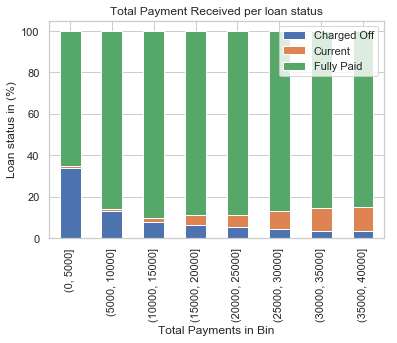

In [88]:
# Forming Bins
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000,40000]

# Plot 
loan['total_pymnt_binned'] = pd.cut(loan.total_pymnt, bins)
pd.crosstab(loan.total_pymnt_binned, [loan.loan_status]).apply(lambda x: x/x.sum()*100, 
                                                                     axis=1).plot.bar(stacked=True)
plt.legend(loc='upper right')
plt.xlabel('Total Payments in Bin')
plt.ylabel('Loan status in (%)')
plt.title('Total Payment Received per loan status')

plt.show()

### Observation:
##### 1) After paying first 10000, there are low chances of the loan getting defaulted.
##### 2) More Total payment is done, less is the change that loan will Default.

### Analsying pub_rec

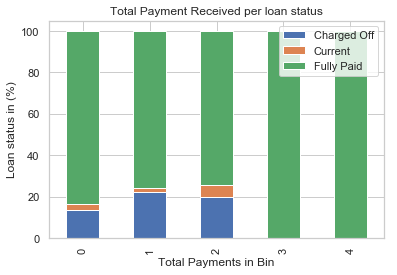

In [89]:
# 
pd.crosstab(loan.pub_rec, [loan.loan_status]).apply(lambda x: x/x.sum()*100, axis=1).plot.bar(stacked=True)
plt.legend(loc='upper right')
plt.xlabel('Total Payments in Bin')
plt.ylabel('Loan status in (%)')
plt.title('Total Payment Received per loan status')

plt.show()

### Observation:
##### higher the pub_rec, lower is the number of loans given.

### Analysing mths_since_last_delinq

In [90]:
# Replacing nan with 0 as we donot know the last delinquency 
loan["mths_since_last_delinq"] = loan["mths_since_last_delinq"].fillna(value=0)

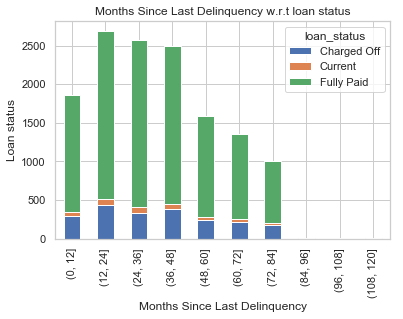

In [91]:
bins = [0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120]
loan['binned'] = pd.cut(loan.mths_since_last_delinq, bins)
pd.crosstab(loan.binned, [loan.loan_status]).plot.bar(stacked=True)
plt.xlabel('Months Since Last Delinquency')
plt.ylabel('Loan status')
plt.title('Months Since Last Delinquency w.r.t loan status')
plt.show()

### Observation:
##### The defaulters trend is on decrease for higher months of since last delinquency

### Analysing total_acc and open_acc 

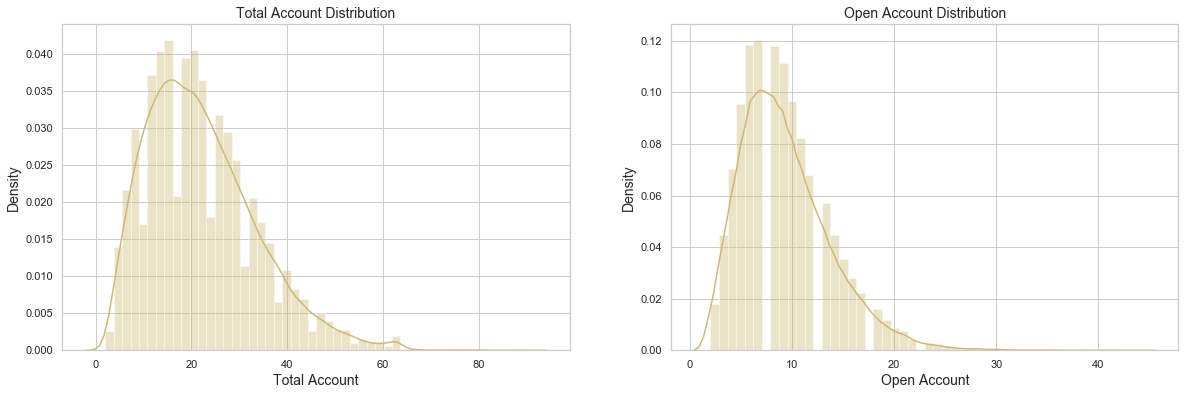

In [92]:
# Analysing total_acc and open_acc 

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title("Total Account Distribution", fontsize=14)
sns.distplot(loan['total_acc'], color='y')
plt.xlabel("Total Account", fontsize=14)
plt.ylabel("Density", fontsize=14)

plt.subplot(1,2,2)
plt.title("Open Account Distribution", fontsize=14)
sns.distplot(loan['open_acc'], color='y')
plt.xlabel("Open Account", fontsize=14)
plt.ylabel("Density", fontsize=14)
#plt.xlim(0,250000)

plt.show()


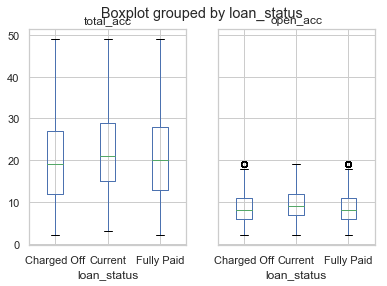

In [93]:
loan[(loan["total_acc"] < 50) & (loan["open_acc"] < 20)].boxplot(column=["total_acc", "open_acc"], 
                                                                          by="loan_status")

plt.show()

### Observation:
##### 1) we can say that total_acc has outliers beyond 50 and open_acc has outliers beyond 20, so considering upper limit as 50 and 20 respectively
##### 2) Nothing much impact of total_acc and open_acc on loan_status as overall the median remains constant

### Analyse total_rec_prncp

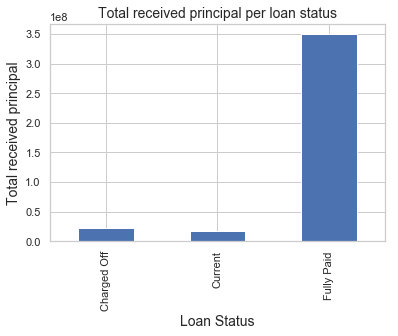

In [94]:
# Plot bar graph to see the Sum of Total received principal across Loan Status.
loan.groupby('loan_status')['total_rec_prncp'].sum().plot.bar()
plt.title("Total received principal per loan status", fontsize=14)
plt.xlabel("Loan Status", fontsize=14)
plt.ylabel("Total received principal", fontsize=14)
plt.show()

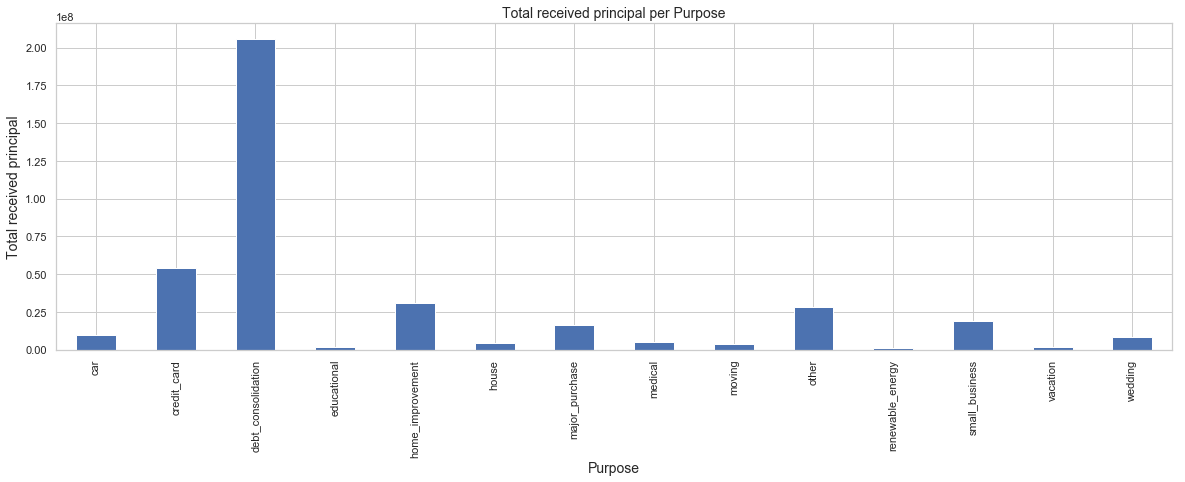

In [95]:
# Plot bar graph to see the Sum of Total received principal across Purpose.
plt.figure(figsize=(20,6))
loan.groupby('purpose')['total_rec_prncp'].sum().plot.bar()
plt.title("Total received principal per Purpose", fontsize=14)
plt.xlabel("Purpose", fontsize=14)
plt.ylabel("Total received principal", fontsize=14)
plt.show()

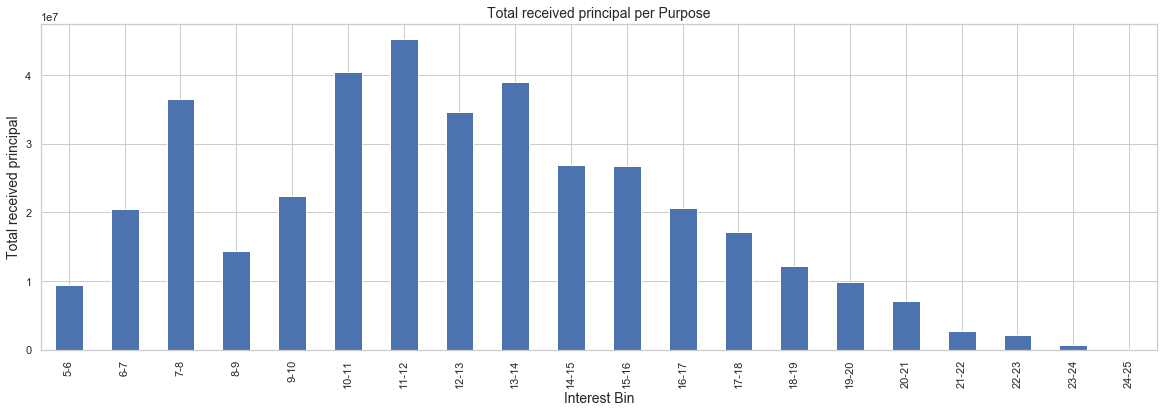

In [96]:
# Plot bar graph to see the Sum of Total received principal across Interest Bin.
plt.figure(figsize=(20,6))
loan.groupby('Interest Rate Bin')['total_rec_prncp'].sum().plot.bar()
plt.title("Total received principal per Purpose", fontsize=14)
plt.xlabel("Interest Bin", fontsize=14)
plt.ylabel("Total received principal", fontsize=14)
plt.show()

### Observation:
##### 1) Total received principal is from "Fully Paid" loans (As expected)
##### 2) With-in Purpose, Debt Consolidation has attracted maximum Total principal.
##### 3) With-in Interest Rate Bins, maximum Total principal is attracted from 11%-12% Interest range.

### Analyse total_rec_int

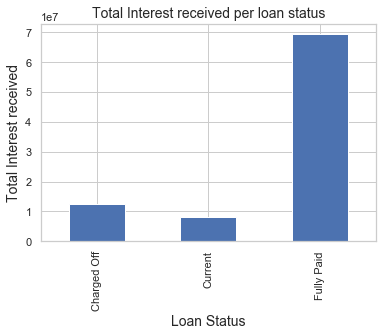

In [97]:
# Plot bar graph to see the Sum of Total Interest received across Loan Status.
loan.groupby('loan_status')['total_rec_int'].sum().plot.bar()
plt.title("Total Interest received per loan status", fontsize=14)
plt.xlabel("Loan Status", fontsize=14)
plt.ylabel("Total Interest received", fontsize=14)
plt.show()

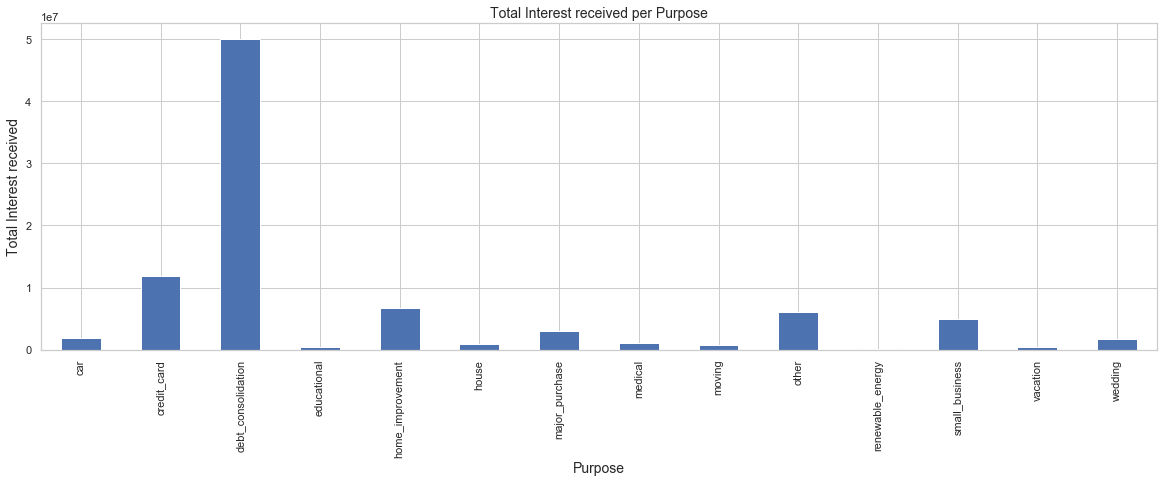

In [98]:
# Plot bar graph to see the Sum of Total Interest received across Purpose.
plt.figure(figsize=(20,6))
loan.groupby('purpose')['total_rec_int'].sum().plot.bar()
plt.title("Total Interest received per Purpose", fontsize=14)
plt.xlabel("Purpose", fontsize=14)
plt.ylabel("Total Interest received", fontsize=14)
plt.show()

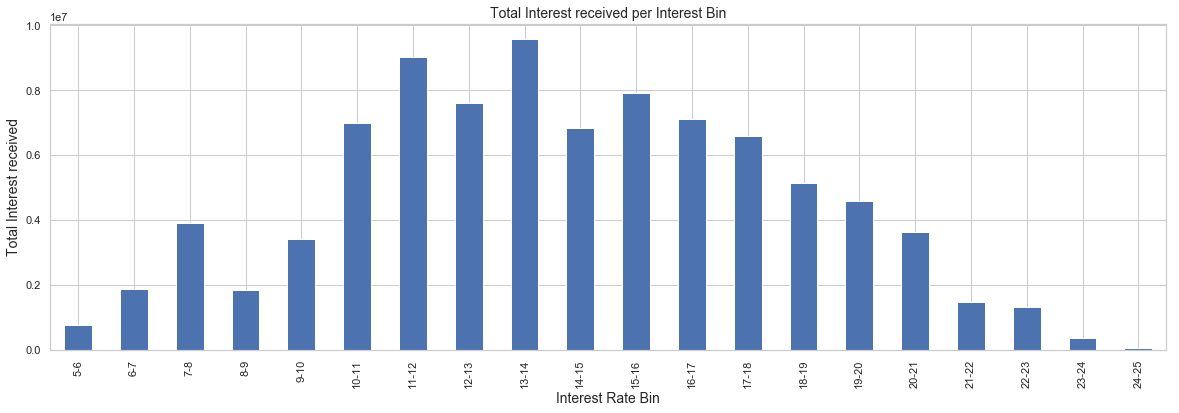

In [99]:
# Plot bar graph to see the Sum of Total Interest received across Interest Rate bin..
plt.figure(figsize=(20,6))
loan.groupby('Interest Rate Bin')['total_rec_int'].sum().plot.bar()
plt.title("Total Interest received per Interest Bin", fontsize=14)
plt.xlabel("Interest Rate Bin", fontsize=14)
plt.ylabel("Total Interest received", fontsize=14)
plt.show()

### Observation:
##### 1) Maximum Sum of Interest Received is from "Fully Paid" loans.
##### 2) With-in Purpose, Debt Consolidation has attracted maximum Interest.
##### 3) With-in Interest Rate Bins, maximum Interest is attracted from 13%-14% Interest range.

### Analyse total_rec_late_fee

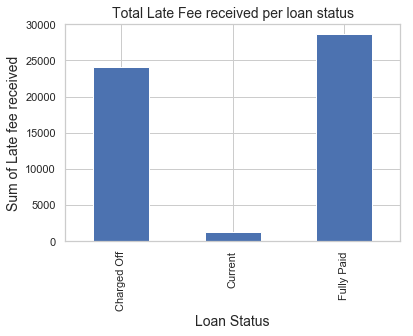

In [100]:
# Plot bar graph to see the Sum of Late fee across loan status
loan.groupby('loan_status')['total_rec_late_fee'].sum().plot.bar()
plt.title("Total Late Fee received per loan status", fontsize=14)
plt.xlabel("Loan Status", fontsize=14)
plt.ylabel("Sum of Late fee received", fontsize=14)
plt.show()

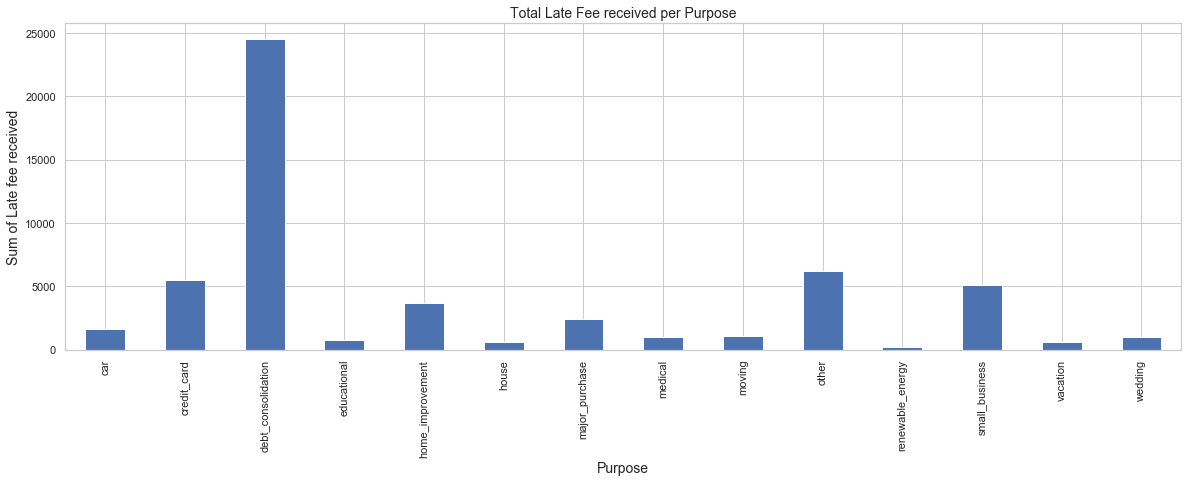

In [101]:
# Plot bar graph to see the Sum of Late fee across Purpose
plt.figure(figsize=(20,6))
loan.groupby('purpose')['total_rec_late_fee'].sum().plot.bar()
plt.title("Total Late Fee received per Purpose", fontsize=14)
plt.xlabel("Purpose", fontsize=14)
plt.ylabel("Sum of Late fee received", fontsize=14)
plt.show()

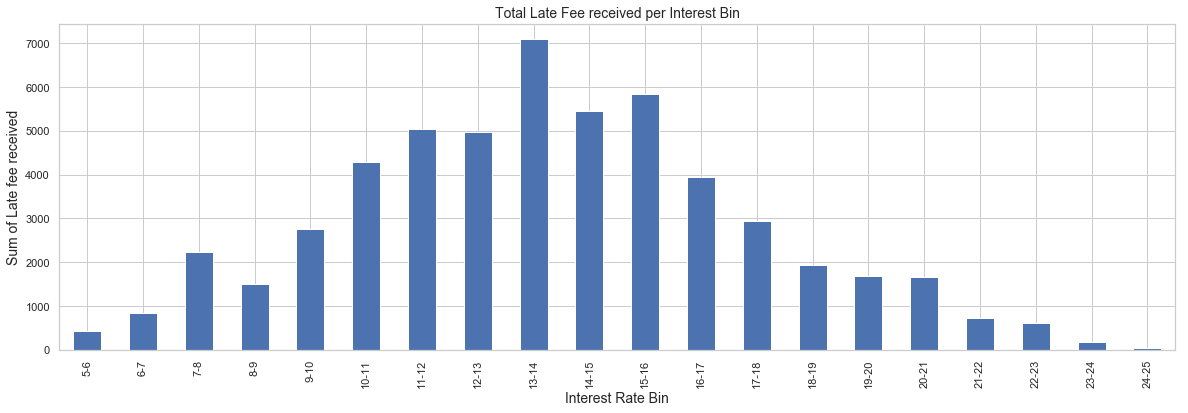

In [102]:
# Plot bar graph to see the Sum of Late fee across Interest Rate Bins.
plt.figure(figsize=(20,6))
loan.groupby('Interest Rate Bin')['total_rec_late_fee'].sum().plot.bar()
plt.title("Total Late Fee received per Interest Bin", fontsize=14)
plt.xlabel("Interest Rate Bin", fontsize=14)
plt.ylabel("Sum of Late fee received", fontsize=14)
plt.show()

### Observation:
##### 1) Maximum Sum of late fee is received from "Fully Paid" loans, followed by "Charged Off" loans.
##### 2) With-in Purpose, Debt Consolidation has attracted maximum Late Fee.
##### 3) With-in Interest Rate Bins, maximum late fee is atracted from 13-14 Interest range.

### Analyse last_pymnt_d

### Grouping last_paymnt_d by quarter

In [103]:
# Creating Quarters 1,2,3,4 for Jan to Dec and 0 for NaN.
q=[]
for i in list(loan["last_pymnt_d"]):
    if pd.isna(i):
        q.append(0)
    else:
        if i.split("-")[0] in ["Jan", "Feb", "Mar"]:
            q.append(1)
        else:
            if i.split("-")[0] in ["Apr", "May", "Jun"]:
                q.append(2)
            else:
                if i.split("-")[0] in ["Jul", "Aug", "Sep"]:
                    q.append(3)
                else:
                    q.append(4)

In [104]:
len(q)

39717

In [105]:
loan["last_pymnt_d_q"] = q

Text(0, 0.5, '% of last_pymnt_d by quarter')

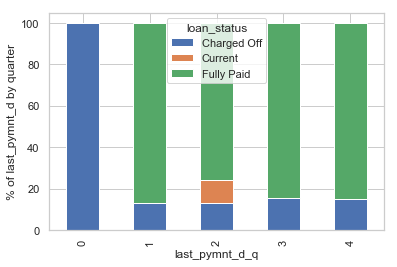

In [106]:
#plt.hist(.)
pd.crosstab(loan.last_pymnt_d_q, loan.loan_status).apply(lambda x: x/x.sum()*100, axis=1).plot.bar(stacked=True)
plt.ylabel("% of last_pymnt_d by quarter")

## Observations:
### There is no effect if last_payment_d on defaulter.

### Analyse last_pymnt_amnt

In [107]:
# calculate Last payment amount is less or more than installment amount paid.
loan['loan_installment_more_last_pymnt'] = np.where(loan.installment > loan.last_pymnt_amnt, 
                                                    'Installment is More','Installment is Less')

In [108]:
# % of loan where Installment amount is more than last payment amount.

color = sns.light_palette("yellow", as_cmap=True)
(pd.crosstab(loan.loan_status,loan.loan_installment_more_last_pymnt, 
             normalize='index').round(4)*100).style.background_gradient(cmap = colr)

loan_installment_more_last_pymnt,Installment is Less,Installment is More
loan_status,,
Charged Off,81.62,18.38
Current,100,0
Fully Paid,90.29,9.71


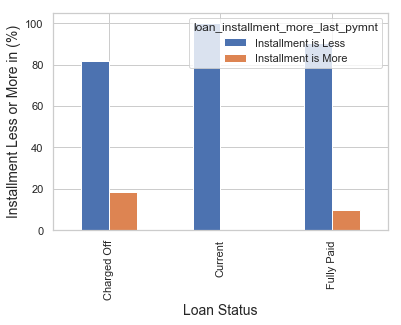

In [109]:
# Plot bar graph
(pd.crosstab(loan.loan_status,loan.loan_installment_more_last_pymnt, 
             normalize='index').round(4)*100).plot.bar()
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Installment Less or More in (%)', fontsize=14)
plt.show()

### Observation:
##### For all three categories Last payment amount is less than Loan Installment.

### Analyse last_credit_pull_d

In [110]:
loan.last_credit_pull_d.unique()

array(['May-16', 'Jan-16', 'Dec-15', 'Sep-15', 'Dec-14', 'Sep-14',
       'Apr-16', 'Apr-14', 'Nov-12', 'Mar-14', 'Jun-14', 'Feb-16',
       'Aug-13', 'Sep-12', 'Feb-13', 'Nov-13', 'May-13', 'Jun-13',
       'Oct-14', 'Oct-15', 'Apr-15', 'Mar-15', 'Feb-15', 'Mar-13',
       'Jan-15', 'Jul-14', 'Jul-15', 'Nov-14', 'May-12', 'Dec-12',
       'Jul-13', 'May-14', 'Nov-15', 'Dec-11', 'Oct-12', 'Apr-13',
       'Jun-12', 'Aug-12', 'Feb-14', 'Feb-12', 'Aug-15', 'May-15',
       'Mar-16', 'Aug-14', 'Apr-12', 'Oct-11', 'Jul-12', 'Jan-14',
       'Oct-13', 'Sep-13', 'Dec-13', 'Nov-11', 'Jun-15', 'Mar-12',
       'Jan-12', 'Aug-11', 'Jan-11', 'May-11', 'Nov-10', 'Oct-10',
       'Sep-10', 'Sep-11', 'Mar-11', 'Jun-11', 'Dec-10', 'Jul-10',
       'Dec-09', 'Apr-10', 'Feb-10', 'May-10', 'Jan-10', 'Oct-09',
       'Mar-09', 'Apr-09', 'Aug-08', 'Apr-11', 'Sep-09', 'Jun-10',
       'Jul-11', 'Oct-08', 'Jun-09', 'Feb-11', 'Aug-07', 'Jul-09',
       'Dec-08', 'May-08', 'Jan-13', 'Mar-08', 'Feb-09', 'Nov-

In [111]:
# Creating Quarters 1,2,3,4 for Jan to Dec and 0 for NaN.
q=[]
for i in list(loan["last_credit_pull_d"]):
    if pd.isna(i):
        q.append(0)
    else:
        if i.split("-")[0] in ["Jan", "Feb", "Mar"]:
            q.append(1)
        else:
            if i.split("-")[0] in ["Apr", "May", "Jun"]:
                q.append(2)
            else:
                if i.split("-")[0] in ["Jul", "Aug", "Sep"]:
                    q.append(3)
                else:
                    q.append(4)

In [112]:
loan["last_credit_pull_d_q"]=q

In [113]:
abs(loan.corr()["last_credit_pull_d_q"])

loan_amnt                  0.021669
funded_amnt                0.023958
funded_amnt_inv            0.021242
int_rate                   0.021827
installment                0.017156
annual_inc                 0.016109
dti                        0.012759
delinq_2yrs                0.001530
inq_last_6mths             0.000767
mths_since_last_delinq     0.009802
open_acc                   0.020545
pub_rec                    0.008064
revol_bal                  0.012936
revol_util                 0.008332
total_acc                  0.024392
out_prncp                  0.040225
out_prncp_inv              0.040187
total_pymnt                0.026999
total_pymnt_inv            0.025122
total_rec_prncp            0.020663
total_rec_int              0.038525
total_rec_late_fee         0.006186
recoveries                 0.003347
collection_recovery_fee    0.004838
last_pymnt_amnt            0.010293
pub_rec_bankruptcies       0.009809
issue_year                 0.029273
last_pymnt_d_q             0

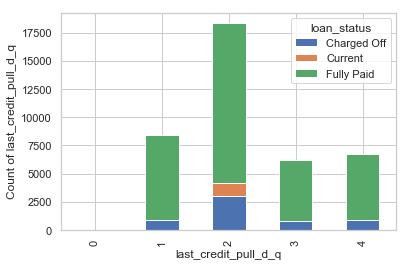

In [114]:
pd.crosstab(loan.last_credit_pull_d_q, loan.loan_status).plot.bar(stacked=True)
plt.ylabel("Count of last_credit_pull_d_q")
plt.show()

## Observations:
### For 2nd Quarter for last_credit_pull_d has high charged off loans

## Analyse pub_rec_bankruptcies

In [115]:
loan[loan["loan_status"]=="Charged Off"].pub_rec_bankruptcies.value_counts()/len(loan[loan["loan_status"]=="Charged Off"])

0.0    0.913631
1.0    0.065044
2.0    0.000355
Name: pub_rec_bankruptcies, dtype: float64

## Observations:
### 1. Around 13% of values are for defaulted loan in pub_rec_bankruptcies columns.
### 2. Out of the defaulted loan 91% are 0, hence ignoring the pub_rec_bankruptcies.

### Removing "out_prncp and out_prncp_inv" Since they are not adding any value to analysis and highly correlated.

In [116]:
loan = loan.drop(['out_prncp','out_prncp_inv'], axis=1)

### Removing "total_pymnt_inv" Since it is highly correlated with "total_rec_paymnt"

In [117]:
loan = loan.drop('total_pymnt_inv', axis=1)

### Removing 'recoveries' and 'collection_recovery_fee' Since it has values only when Loan is defaulted, so it wont help to analyse new record.

In [118]:
loan = loan.drop(['recoveries','collection_recovery_fee'], axis=1)

### Analysing emp_title

##### There are more than 27000 Unique values.
##### Many Employer name are presented in multiple ways causing increase in Unique values.
##### Few examples are: US Army name is presented in multiple ways and US Postal Service name as well.
##### Here some manual approach would be required to clean this column, due to shortage of time we left this column from further analysis.